# Módulo 5 Estadística - Evaluación de un modelo y su aplicación para predicción

### Marcela Ibarra Mora A01231973

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
indEco = pd.read_csv('Indicadores20221122225040.csv')
indEco.head()

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
0,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700.0,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/08,113.320302,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/f1 /p1
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700.0,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.268587,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/f1 /p1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700.0,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/f1 /p1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700.0,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/f1 /p1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700.0,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/f1 /p1


In [3]:
# Nos quedamos con las columnas que se utilizaran dentro del analisis
data = indEco[['Periodo','Valor']]
data = data.loc[0:355].reset_index(drop=True) # Se borran los ultimos renglones que no contienen informacion
data = data.loc[::-1] # Se acomodan las fechas para que sean desde 1993 hasta 2022
data = data.reset_index(drop=True) # Se vueve a reseter el index
data

,Periodo,Valor
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
351,2022/04,109.529866
352,2022/05,114.442424
353,2022/06,112.797501
354,2022/07,111.268587


<function matplotlib.pyplot.show(close=None, block=None)>

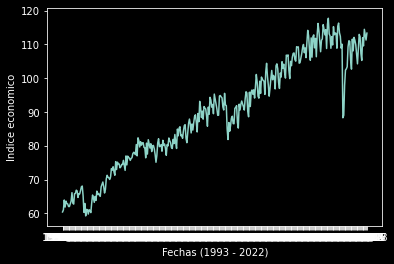

In [4]:
# Graficamos estos datos
plt.plot(data['Periodo'],data['Valor'])
plt.xlabel('Fechas (1993 - 2022)')
plt.ylabel('Indice economico')
plt.show

Al observase esta grafica a simple vista parece que no cuenta con ninguna caracteristica de que se comporta como variable estacionaria. Primero, se obtiene el promedio anual para verificar que sea constante:

In [5]:
# Sacar el año del periodo
data['año'] = data.Periodo.str[0:4]

In [6]:
mean = data.groupby(data['año']).mean()
mean

,Valor
año,
1993,62.763073
1994,65.820599
1995,61.684299
1996,65.898989
1997,70.352236
1998,74.003165
1999,76.016915
2000,79.896427
2001,79.489557


**Parece que los promedios no son constantes, por esto, es probable que la variable no sea estacionaria**

Ahora se verifica la varianza:

<function matplotlib.pyplot.show(close=None, block=None)>

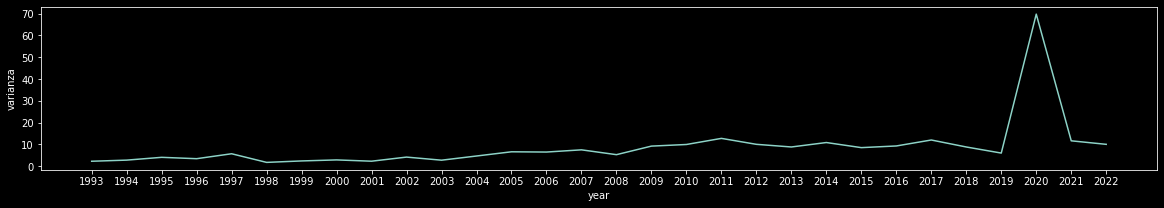

In [7]:
varianza = data.groupby(['año']).var()
plt_1 = plt.figure(figsize=(20, 3))
plt.plot(varianza.index,varianza['Valor'],)
plt.xlabel('year')
plt.ylabel('varianza')
plt.show

**La varianza se repite en periodos, esto puede indicar que la variable no es estacionaria**

Ahora se hace la prueba de estacionariedad, utilizando el crecimieneto anual:

In [8]:
data['log'] = np.log(data['Valor'])
data['anual'] = data['log'] - data['log'].shift(12)
data

,Periodo,Valor,año,log,anual
0,1993/01,60.407691,1993,4.101116,NaN
1,1993/02,61.022521,1993,4.111243,NaN
2,1993/03,63.943249,1993,4.157996,NaN
3,1993/04,61.865984,1993,4.124970,NaN
4,1993/05,63.612900,1993,4.152816,NaN
...,...,...,...,...,...
351,2022/04,109.529866,2022,4.696197,0.013414
352,2022/05,114.442424,2022,4.740072,0.021001
353,2022/06,112.797501,2022,4.725594,0.014522
354,2022/07,111.268587,2022,4.711947,0.012578


<function matplotlib.pyplot.show(close=None, block=None)>

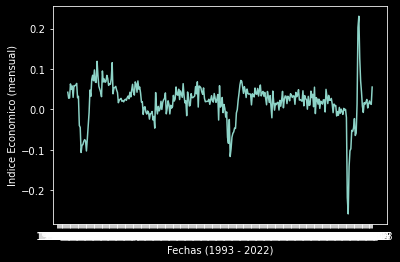

In [9]:
plt.plot(data['Periodo'],data['anual'])
plt.xlabel('Fechas (1993 - 2022)')
plt.ylabel('Indice Economico (mensual)')
plt.show

In [10]:
from statsmodels.tsa.stattools import adfuller
data.dropna(inplace=True) # se eliminan los Nan
adfuller(data['anual']) 

(-3.772663892019733,
 0.003199714140110683,
 17,
 326,
 {'1%': -3.4505694423906546,
  '5%': -2.8704469462727795,
  '10%': -2.5715154495841017},
 -1452.2989399974608)

**El primer dato de -3.77 nos indica que los datos son estacionaros, este dato es el t-value que nos indica que si es mayor de 2(abs) unidades, podemos rechazar la hipotesis nula, la cual es que los datos no son estacionarios. El segundo valor nos indica el p-value, para demostrar la probabilidad de que la hipotesis nula sea correcta, en este caso esta probabilidad es de 0.3%, la cual es muy baja. En conclusion, los datos son estacionarios.**

Para ACF y PACF:

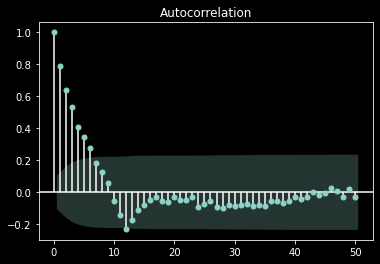

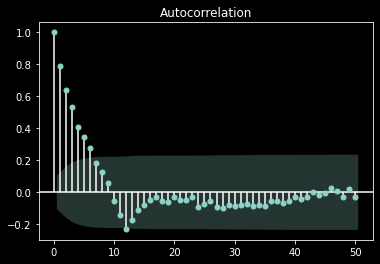

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['anual'], lags=50)

**Este grafico de Autocorelacion es una herramienta que se utiliza para identificar el nivel de correlacion de una serie de tiempo. Donde se mide la correlacion con respecto a los lags dentro de un periodo de tiempo. El area azul representa los datos los cuales no son estadisticamente significativos. Esto quiere decir que para los lags de 0 a aprox 7, su correlacion es significativa.**

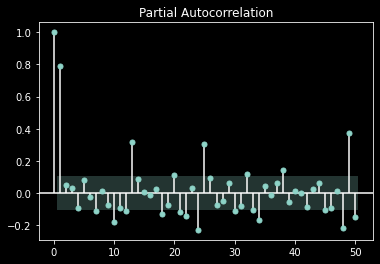

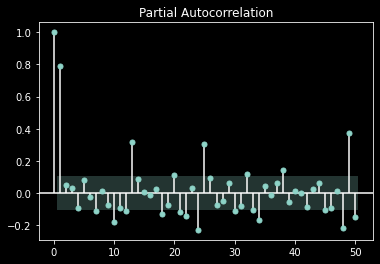

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['anual'], lags=50)

**De la misma manera, PACF tambien despliega la correlacion en una serie de tiempo, solo que la diferencia que puede ser aplicada o demostrada con una regresion lineal. Observando mas de cerca, se puede notar que aprox cada 12 lags se tiene una correlacion significativa**

**Para el modelado se utilizara un modelo SARIMA donde se determinan los siguientes parametros:**

**Seasonal Difereces (D): Se determina con el resultado del test Dickey-Fuller, donde el resultado fue que la serie es estacionaria por lo tanto D=1 y d=0**

**Autoregressive order model (P): Este se determina con el grafico PACF, donde p = 1 y P =0**

**Moving Average Model (Q): Este se determina con ACF, donde al observar la cantidad de lags que se salen del area de datos significativos, se determina q = 2 y Q = 1**

**Asi como un S = 12, ya que estamos haciendo un analisis anual**

In [13]:
df = data[['log','Periodo']].set_index(data['Periodo'])
df = df.drop(['Periodo'],axis=1)
df

,log
Periodo,
1994/01,4.143599
1994/02,4.138890
1994/03,4.186472
1994/04,4.188013
1994/05,4.202583
...,...
2022/04,4.696197
2022/05,4.740072
2022/06,4.725594


In [14]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['log'], oder=(1,0,2), seasonal_order=(0,1,1,12))
model_result = model.fit()

c:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [15]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  log   No. Observations:                  344
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 768.519
Date:                              Thu, 24 Nov 2022   AIC                          -1531.038
Time:                                      02:06:33   BIC                          -1519.622
Sample:                                  01-01-1994   HQIC                         -1526.485
                                       - 08-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9808      0.014     72.448      0.000       0.954       1.007
ma.S.L12      -0.8385      0.046    -18.174      0.000      -0.929      -0.748
sigma2         0.0005   1.43e-05     38.066      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.74   Jarque-Bera (JB):              5315.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Al observar el coeficiente ar.L1 se puede ver que el ÍNDICE GLOBAL DE ACTIVIDAD ECONÓMICA es positivo y significativo (98%). Tambien se puede observar que con relacion al año pasado, el crecimiento del indice es en promedio más bajo, debido al -83% de ma.S.L12**

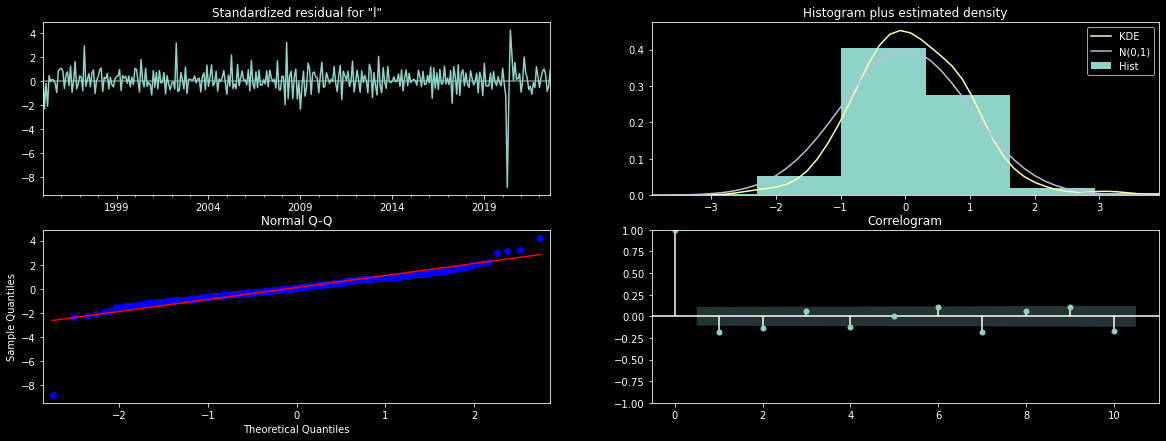

In [16]:
model_result.plot_diagnostics(figsize=(20,7));

In [17]:
pred = np.exp(model_result.predict(start=data.shape[0],end=data.shape[0]+36)).reset_index(drop=True)
pred

0     110.325728
1     115.886000
2     117.718993
3     116.091713
4     112.001541
5     109.125549
6     114.193985
7     109.506916
8     113.208627
9     113.465743
10    112.853735
11    112.848991
12    109.875668
13    115.422321
14    117.257010
15    115.644851
16    111.578689
17    108.721455
18    113.779231
19    109.116812
20    112.813070
21    113.076890
22    112.474396
23    112.476942
24    109.520370
25    115.056245
26    116.892248
27    115.292004
28    111.244778
29    108.402336
30    113.451672
31    108.808702
32    112.500633
33    112.769730
34    112.174734
35    112.183023
36    109.239667
Name: predicted_mean, dtype: float64

In [18]:
prediction = data.Valor
prediction = prediction.append(pred, ignore_index=True)
prediction

0       63.029268
1       62.733156
2       65.790275
3       65.891716
4       66.858802
          ...    
376    112.500633
377    112.769730
378    112.174734
379    112.183023
380    109.239667
Length: 381, dtype: float64

In [19]:
data = data.reset_index(drop=True)
data

,Periodo,Valor,año,log,anual
0,1994/01,63.029268,1994,4.143599,0.042483
1,1994/02,62.733156,1994,4.138890,0.027647
2,1994/03,65.790275,1994,4.186472,0.028476
3,1994/04,65.891716,1994,4.188013,0.063042
4,1994/05,66.858802,1994,4.202583,0.049767
...,...,...,...,...,...
339,2022/04,109.529866,2022,4.696197,0.013414
340,2022/05,114.442424,2022,4.740072,0.021001
341,2022/06,112.797501,2022,4.725594,0.014522
342,2022/07,111.268587,2022,4.711947,0.012578


<function matplotlib.pyplot.show(close=None, block=None)>

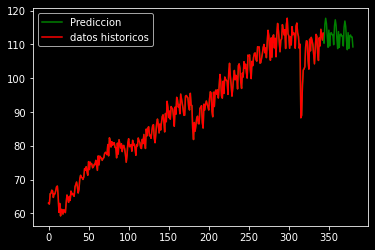

In [20]:
plt.plot(prediction, color='g', label='Prediccion')
plt.plot(data['Valor'], color='r', label='datos historicos')
plt.legend()
plt.show